In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Product Sales Analysis\sales_data_cleaned.csv')

df.head(2)

,ordernumber,quantityordered,priceeach,orderlinenumber,sales,orderdate,status,qtr_id,month_id,year_id,...,customername,city,state,postalcode,country,territory,contactlastname,contactfirstname,dealsize,month
0,10107,30,95.70,2,2871.0,2003-02-24,Shipped,1,2,2003,...,Land of Toys Inc.,NYC,NY,10022,USA,North America,Yu,Kwai,Small,February
1,10121,34,81.35,5,2765.9,2003-05-07,Shipped,2,5,2003,...,Reims Collectables,Reims,Unknown,51100,France,EMEA,Henriot,Paul,Small,May


In [3]:
df['orderdate'] = pd.to_datetime(df['orderdate'])
#df.info()

-   Let's see Top 10 coutries by Sales

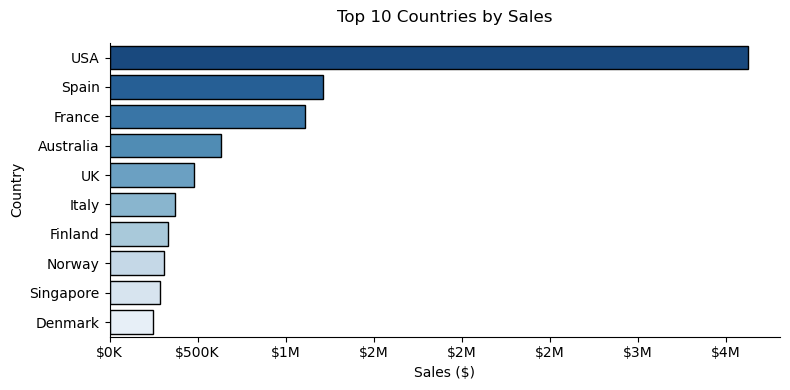

In [4]:
# Sales by Country
sales_by_country = df.groupby('country')['sales'].sum().reset_index().sort_values(by='sales', ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=sales_by_country,
    x='sales',
    y='country',
    palette='Blues_r',
    edgecolor='black'
)

def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e6:
        return '${:,.0f}M'.format(x * 1e-6)
    else:
        return '${:,.0f}K'.format(x * 1e-3)
    
plt.gca().xaxis.set_major_formatter(FuncFormatter(currency))

plt.title('Top 10 Countries by Sales', pad=15)
plt.xlabel('Sales ($)')
plt.ylabel('Country')

sns.despine()
plt.tight_layout()
plt.show()

-   **Key Highlights:**

-   Top Contributor
    - **🇺🇸 USA** dominates with over **$4M in sales**, far ahead of all other countries.
    - This makes it the **primary market** and a crucial driver of revenue.

-   Other Strong Performers
    - **🇪🇸 Spain** and **🇫🇷 France** follow, each generating more than **$1M** in sales.
    - They represent significant but secondary markets.

-   Mid-Tier Markets
    - **🇦🇺 Australia** and **🇬🇧 UK** show moderate sales volumes (~$500K–$800K).
    - These may benefit from targeted growth strategies.

-   Long-Tail Countries
    - Countries like **Italy**, **Finland**, **Norway**, **Singapore**, and **Denmark** show lower sales figures (< $500K).
    - These markets may require localization, awareness campaigns, or partner distribution strategies.
-----

-   Now, let's see how sales performance varies across territories based on the deal size categories:

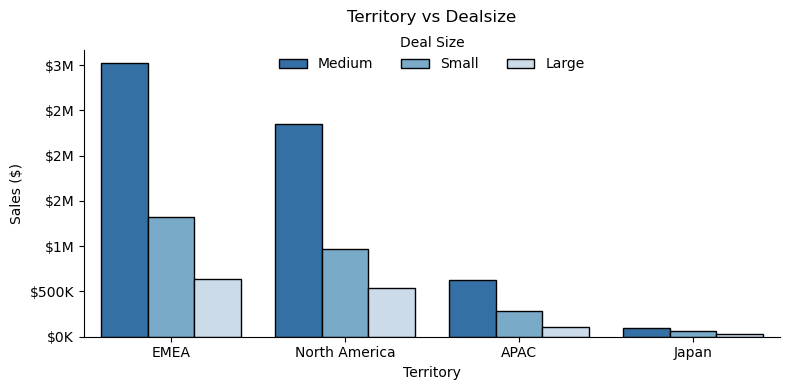

In [5]:
# Territory vs Deal Size
territory_dealsize = df.groupby(['territory', 'dealsize'])['sales'].sum().reset_index()
territory_dealsize.sort_values(by='sales', ascending=False, inplace=True)

plt.figure(figsize=(8, 4))
sns.barplot(
    data=territory_dealsize,
    x='territory',
    y='sales',
    hue='dealsize',
    palette='Blues_r',
    edgecolor='black'
)

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency)) # the same currency function as above

plt.title('Territory vs Dealsize', pad=20)
plt.xlabel('Territory')
plt.ylabel('Sales ($)')
plt.legend(title='Deal Size', loc='upper center', ncols=3, frameon=False, bbox_to_anchor=(0, 0.0, 1, 1.09))

sns.despine()
plt.tight_layout()
plt.show()

-   **Insights:**

-   EMEA (Europe, Middle East & Africa)
    - **Highest overall sales**: Over **$5M** total.
    - **Medium-sized deals** dominate (~$3M), followed by Small and Large.
    - Suggests strong mid-market presence and upsell potential.

-   North America
    - Total sales ~**$4M**, with a similar pattern to EMEA.
    - Medium deals lead, followed by Small, then Large.
    - Comparable to EMEA but slightly lower across all deal sizes.

-   APAC (Asia-Pacific)
    - Noticeably lower sales (~$1.2M).
    - Still, Medium deals are the largest segment.
    - Potential growth territory; might benefit from more regional focus.

-   Japan
    - Very small market footprint (~$100K total).
    - All deal sizes contribute marginally.
    - Requires strategic decisions: invest or maintain minimal presence.
--------

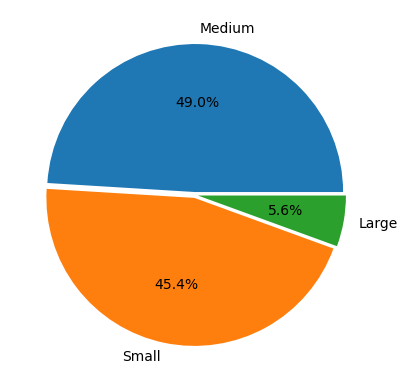

In [6]:
# Deal Size Distribution
dealsize_dist = df['dealsize'].value_counts().reset_index()
dealsize_dist.columns = ['status', 'count']


plt.figure(figsize=(8, 4))
plt.pie(
    dealsize_dist['count'],
    labels=dealsize_dist['status'],
    autopct='%1.1f%%',
    explode=(0.02, 0.02, 0.02),

)

plt.tight_layout()
plt.show()

# Deal Size Distribution

This pie chart illustrates the **proportion of total deals** by size category.

- **Medium Deals**: 🟦 **49.0%**  
  → Nearly **half** of all deals fall into this category.  
  → Core revenue driver and the most consistent segment.

- **Small Deals**: 🟧 **45.4%**  
  → Also a **significant contributor**, slightly below medium deals.  
  → Indicates a healthy volume of transactions, possibly with lower individual value.

- **Large Deals**: 🟩 **5.6%**  
  → A **small but notable share**.  
  → These may represent strategic accounts with high individual value but low frequency.

--------

In [7]:
# Group by country and calculate average deal size
geo_analysis = df.groupby('country').agg({
    'sales': 'sum',
    'ordernumber': 'nunique',
    'dealsize': lambda x: x.value_counts(normalize=True)['Small']  # % of small deals
}).reset_index()

# Visualize using geospatial plots
import plotly.express as px
fig = px.choropleth(
    geo_analysis,
    locations='country',
    locationmode='country names',
    color='sales',
    hover_name='country',
    title='Total Sales by Country',
    width=800,
    height=500,
)
fig.show()

This choropleth map visually represents **total sales distribution** across various countries.

### Key Highlights:

- **Top Performing Countries**:
  - 🇺🇸 **USA**: Highest sales volume, indicated by **bright yellow**.  
  - 🇪🇸 **Spain**: Among the top, with strong sales in **lighter shades**.  
  - 🇫🇷 **France**, 🇬🇧 **UK**, 🇦🇺 **Australia**: Also notable contributors.

- **Mid-range Performers**:
  - **Northern and Western Europe**: Countries like **Finland, Norway, and Italy** show **moderate sales**.  
  - 🇨🇦 **Canada**: Noteworthy performance in **North America**.

- **Lower Sales Regions**:
  - Some parts of **Asia** and **South America** show **limited or no activity**, indicating potential markets for future expansion.

-----